<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-21
# DS-Unit-1-Sprint-4-Linear-Algebra-master/

In [0]:
import numpy as np
import pandas as pd
import random

from math import pi, e

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

# Linear Algebra Sprint Challenge

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

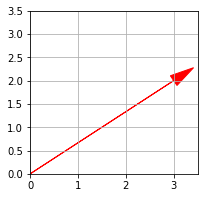

In [2]:
va = [3, 2]
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_xlim(0,3.5)
ax.set_ylim(0,3.5)
ax.grid(True)

plt.arrow(0,0, va[0],va[1], 
          head_width=.25, head_length=0.5, color ='red');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
vb = np.array([17, -4, -2, 1])
np.linalg.norm(vb)

17.60681686165901

In [4]:
# the norm of a vector is a strictly positive length
# or size to the vector in a vector space
np.dot(vb, vb) ** 0.5

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
# the two vectors are not orthogonal, cause their dot
# product is not 0
vc = np.array([3, 7, -2, 12])
vd = np.array([9, -7, 4, 6])
np.dot(vc, vd)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [6]:
ve = np.array([[7, 4, 2],
               [1, 3, -1],
               [2, 6, -4]
              ])
np.linalg.inv(ve)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [7]:
ve.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [8]:
np.dot(ve, np.linalg.inv(ve)).round(10)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0., -0.,  1.]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [100]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [10]:
##### Your Code Here #####
# means
means = df.describe().loc['mean']
means

customers    1135.714286
snow            2.714286
Name: mean, dtype: float64

In [11]:
# standard deviations
stds = df.describe().loc['std']
stds

customers    314.264069
snow           2.927700
Name: std, dtype: float64

In [101]:
# variances
variances = df.describe().loc['std'] ** 2
variances

customers    98761.904762
snow             8.571429
Name: std, dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# not really unless we standardize the data first
# (so the two measurements have the same scale),
# then we could compare the variances of each datapoint.

# or we standardize the data first, then compare the 
# variance of a feature with the variance of another feature.

<img src="https://i1.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/variation06.gif?resize=418%2C193">

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [14]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [41]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
##### Your Code Here #####
data = df.drop('Country', axis=1).values

In [67]:
# standardize the dataset
data_st = StandardScaler().fit_transform(data)
data_st

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [89]:
print(data_st.shape)
print(len(data_st))
print(len(data_st.T))

(4, 17)
4
17


In [69]:
# verify the standardization
# std=1.15, cause (std**2)*(N-1) = (1**2)*N, and N=4
pd.DataFrame(data_st).describe().round(2).loc[['mean', 'std']]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15


In [71]:
# verify means
means = np.array([row.mean().round(10) for row in data_st.T])
means

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0., -0.,  0.,  0.])

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [19]:
# check data
data.head(2)

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64


In [21]:
##### Your Code Here #####

# 17 features, 4 samples
pipeline = Pipeline([('scaling', StandardScaler()), 
                     ('pca', PCA())]) # only 4 samples
data_pca = pipeline.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.head(2)

,0,1,2,3
0,-0.954490,0.328318,1.829829,2.031442e-16
1,-4.520951,-1.735380,-0.781412,2.031442e-16


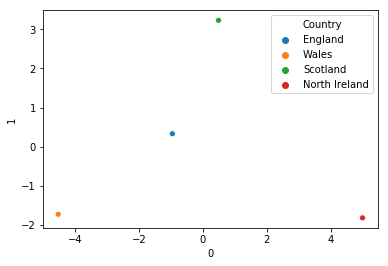

In [26]:
data_pca['Country'] = df['Country']
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='Country',
               );

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [27]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


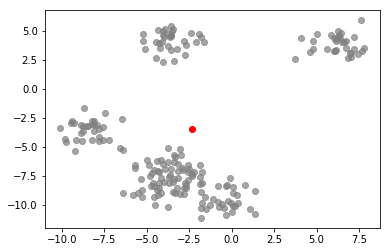

In [31]:
##### Your Code Here #####
center = [points[col].mean() for col in points]
plt.scatter(points['x'], points['y'], color='gray', alpha=0.7)
plt.plot(center[0], center[1], "or")
plt.show()

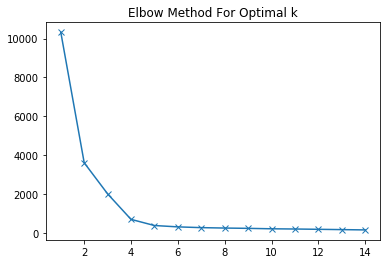

In [33]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, marker="x")
plt.title('Elbow Method For Optimal k');

In [37]:
# choose k=4
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)
labels = kmeans.labels_
print(labels)

[0 2 2 0 2 2 0 0 1 2 2 2 2 2 0 2 0 2 2 3 0 3 3 3 2 2 2 1 2 2 2 2 2 3 2 2 2
 2 1 2 2 3 1 1 1 2 2 2 0 2 3 0 0 1 3 2 2 1 1 0 3 2 0 1 3 1 3 1 0 1 2 2 2 2
 3 3 2 2 1 3 1 2 2 2 1 2 1 2 2 3 1 2 3 2 2 2 2 2 2 2 2 2 0 2 2 3 0 0 0 3 2
 3 2 0 2 2 1 1 3 1 3 2 2 0 2 0 2 3 1 0 2 0 2 0 1 1 2 3 0 2 1 2 2 3 2 1 2 1
 0 2 2 2 0 3 2 1 2 3 2 0 2 2 1 0 3 3 2 1 2 2 0 2 1 3 2 2 2 2 2 0 2 2 2 2 2
 2 0 3 1 2 2 0 3 0 2 1 3 3 2 2]


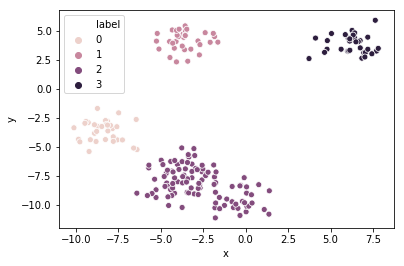

In [39]:
# visualize the clustering
points['label'] = labels
sns.scatterplot(x='x', y='y', data=points, 
                hue='label',
               );